# Introduction to dimensionality reduction using Ivis

In this notebook we will illustrate basic usage of the [`Ivis`](https://github.com/beringresearch/ivis) library for dimensionality reduction of structured datasets.

In [ ]:
!pip install git+https://github.com/beringresearch/ivis

In [1]:
# Ivis uses several stochastic processes.
# To make sure that results are consistent from one run to another,
# we fix the random seed

import os
os.environ["PYTHONHASHSEED"]="1234"

import random
import numpy as np

import tensorflow as tf

np.random.seed(1234)
random.seed(1234)
tf.random.set_seed(1234)

In [2]:
from ivis import Ivis

## 1. Data import

Here, we'll use the Reuters Corpus Volume I (RCV1) dataset - an archive of over 800,000 manually categorized newswire stories made available by Reuters, Ltd. for research purposes. For more information on the dataset and its structure, checkout the [scikit-learn description](https://scikit-learn.org/stable/datasets/real_world.html#rcv1-dataset).

In [6]:
from sklearn.datasets import fetch_rcv1
from sklearn.utils import resample

> **NOTE**: This is a large download and can take some time 

In [4]:
rcv1 = fetch_rcv1()
rcv1.data.shape

(804414, 47236)

In [7]:
N_SAMPLES = 10000 # number of subsamples. Increase or decrease depending on your hardware.

X, y = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)

Note that `X` is a sparse matrix. Ivis can easily handle both sparse and dense matrices without any extra requirements.

In [8]:
X

<10000x47236 sparse matrix of type '<class 'numpy.float64'>'
	with 755294 stored elements in Compressed Sparse Row format>

## 1a. OPTIONAL: Reducing number of features prior to dimensionality reduction

Our dataset contains over 47,000 features. Whilst Ivis is able to handle this feature space without any issues, there have been indications that reducing featurespace can help aid non-linear dimensionality reduction methods (e.g. [El-ad David Amir, et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4076922/)). As an optional preprocessing step, we can reduce dimensionality of our dataset using Singular Value Decomposition. This step will also considerably speed up nearest neighbour retrieval operation downstream.

In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
X = TruncatedSVD(n_components=150).fit_transform(X)

## 2. Dimensionality reduction using Ivis

In [13]:
ivis = Ivis(model='maaten', n_epochs_without_progress=5)
ivis.fit(X)

Building KNN index


100%|██████████| 10000/10000 [00:00<00:00, 57021.92it/s]


Extracting KNN neighbours


100%|█████████▉| 9991/10000 [00:01<00:00, 6699.40it/s]


Training neural network
Epoch 1/1000
79/79 [==============================] - 3s 29ms/step - loss: 1.5960
Epoch 2/1000
79/79 [==============================] - 2s 29ms/step - loss: 1.2939
Epoch 3/1000
79/79 [==============================] - 2s 30ms/step - loss: 1.1599
Epoch 4/1000
79/79 [==============================] - 2s 30ms/step - loss: 1.0580
Epoch 5/1000
79/79 [==============================] - 2s 30ms/step - loss: 1.0527
Epoch 6/1000
79/79 [==============================] - 3s 32ms/step - loss: 1.0576
Epoch 7/1000
79/79 [==============================] - 3s 33ms/step - loss: 1.0466
Epoch 8/1000
79/79 [==============================] - 3s 32ms/step - loss: 1.0469
Epoch 9/1000
79/79 [==============================] - 3s 33ms/step - loss: 1.0333
Epoch 10/1000
79/79 [==============================] - 2s 30ms/step - loss: 1.0324
Epoch 11/1000
79/79 [==============================] - 2s 30ms/step - loss: 0.9844
Epoch 12/1000
79/79 [==============================] - 2s 31ms/step - lo

Ivis(annoy_index_path='annoy.index', callbacks=[], model='maaten',
     n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7f2c6697ec10>)

## 3. Visualise Ivis embeddings

In [14]:
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [15]:
embeddings = ivis.transform(X)

79/79 [==============================] - 0s 4ms/step


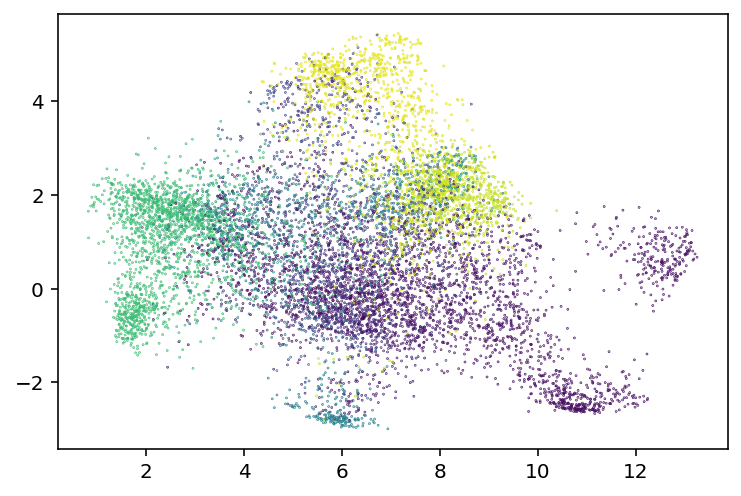

In [24]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=0.1, c=np.argmax(y.toarray(), axis=1))